<a href="https://colab.research.google.com/github/rprincipeg/El-impacto-de-la-adiccion-a-las-redes-sociales-en-el-rendimiento-academico-de-los-estudiantes/blob/main/Proyecto_de_predicci%C3%B3n_de_adicci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea
Se analizó el conjunto de datos 'Estudiantes_Adiccion_Redes_Sociales_sin_tildes.xlsx' para predecir 'Afecta_Rendimiento' preprocesando los datos, aplicando y evaluando modelos de Regresión Lineal/Logística, J48 (Árbol de Decisión) y Naive Bayes, luego comparando su desempeño para identificar el mejor modelo.

## Cargar Dataset

### Subtarea:
Cargar el archivo 'Estudiantes_Adiccion_Redes_Sociales_sin_tildes.xlsx' en un DataFrame de pandas.



Para cargar el archivo Excel, primero se necesita importar la biblioteca pandas, que es una biblioteca fundamental para la manipulación de datos en Python.



In [41]:
import pandas as pd
print("pandas imported as pd")

pandas imported as pd


Ahora que pandas está importado, se cargará el archivo Excel 'Estudiantes_Adiccion_Redes_Sociales_sin_tildes.xlsx' en un DataFrame llamado df_social_media_addictiony se mostrará sus primeras filas para verificar la carga.



In [42]:
df_social_media_addiction = pd.read_csv('Estudiantes_Adiccion_Redes_Sociales_sin_tildes (2).csv')
print("DataFrame 'df_social_media_addiction' loaded successfully.")
df_social_media_addiction.head()

DataFrame 'df_social_media_addiction' loaded successfully.


,ID_Estudiante,Edad,Genero,Nivel_Academico,Pais,Horas_Promedio_Uso_Diario,Plataforma_Mas_Usada,Afecta_Rendimiento_Academico,Horas_Sueno_Por_Noche,Puntaje_Salud_Mental,Estado_Civil,Conflictos_Por_Redes_Sociales,Puntaje_Adiccion
0,1,19,Femenino,Pregrado,Bangladesh,5.2,Instagram,Si,6.5,6,En Relacion,3,8
1,2,22,Masculino,Posgrado,India,2.1,Twitter,No,7.5,8,Soltero/a,0,3
2,3,20,Femenino,Pregrado,USA,6.0,TikTok,Si,5.0,5,Complicado/a,4,9
3,4,18,Masculino,Secundaria,UK,3.0,YouTube,No,7.0,7,Soltero/a,1,4
4,5,21,Masculino,Posgrado,Canada,4.5,Facebook,Si,6.0,6,En Relacion,2,7


In [43]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_social_media_addiction)

https://docs.google.com/spreadsheets/d/1oYWqscuG6SpQrrQo5Ff51k3svHRURuWTNHybMdO5bmQ/edit#gid=0


# Tarea
Se realizó una exploración de datos inicial en el df_social_media_addictionDataFrame para comprender su estructura, tipos de datos e identificar cualquier valor faltante, como siguiente paso en el preprocesamiento de datos.

## Realizar la exploración inicial de datos




 Para comprender la estructura del DataFrame, los tipos de datos e identificar los valores faltantes, se utilizó df.info()para un resumen conciso, df.describe()para estadísticas descriptivas de columnas numéricas y df.isnull().sum()para contar los valores faltantes por columna.


In [44]:
print("DataFrame Information:")
df_social_media_addiction.info()

print("\nDescriptive Statistics:")
df_social_media_addiction.describe()

print("\nMissing Values per Column:")
df_social_media_addiction.isnull().sum()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_Estudiante                  705 non-null    int64  
 1   Edad                           705 non-null    int64  
 2   Genero                         705 non-null    object 
 3   Nivel_Academico                705 non-null    object 
 4   Pais                           705 non-null    object 
 5   Horas_Promedio_Uso_Diario      705 non-null    float64
 6   Plataforma_Mas_Usada           705 non-null    object 
 7   Afecta_Rendimiento_Academico   705 non-null    object 
 8   Horas_Sueno_Por_Noche          705 non-null    float64
 9   Puntaje_Salud_Mental           705 non-null    int64  
 10  Estado_Civil                   705 non-null    object 
 11  Conflictos_Por_Redes_Sociales  705 non-null    int64  
 12  Puntaje_Adiccion           

,0
ID_Estudiante,0
Edad,0
Genero,0
Nivel_Academico,0
Pais,0
Horas_Promedio_Uso_Diario,0
Plataforma_Mas_Usada,0
Afecta_Rendimiento_Academico,0
Horas_Sueno_Por_Noche,0
Puntaje_Salud_Mental,0


## Convertir variable objetivo y codificar variables categóricas

### Subtask:
Convertir la variable objetivo 'Afecta_Rendimiento_Academico' a un formato numérico y aplicar codificación One-Hot a las demás variables categóricas.


Primero, se convertió la variable de destino «Afecta_Rendimiento_Académico» a un formato numérico (1 para «Sí», 0 para «No»). Luego, se identificó todas las demás columnas categóricas (tipo de objeto) y se aplicó la codificación One-Hot, eliminando las columnas originales para preparar el conjunto de datos para el modelado.


In [45]:
print("Original unique values for 'Afecta_Rendimiento_Academico':", df_social_media_addiction['Afecta_Rendimiento_Academico'].unique())

df_social_media_addiction['Afecta_Rendimiento_Academico'] = df_social_media_addiction['Afecta_Rendimiento_Academico'].map({'Si': 1, 'No': 0})

print("Converted unique values for 'Afecta_Rendimiento_Academico':", df_social_media_addiction['Afecta_Rendimiento_Academico'].unique())

categorical_cols = df_social_media_addiction.select_dtypes(include=['object']).columns.tolist()

if 'ID_Estudiante' in categorical_cols:
    categorical_cols.remove('ID_Estudiante')

print("\nCategorical columns identified for One-Hot Encoding (excluding ID_Estudiante):", categorical_cols)

df_social_media_addiction = pd.get_dummies(df_social_media_addiction, columns=categorical_cols, drop_first=True, dtype=int)

print("\nDataFrame after One-Hot Encoding:")
df_social_media_addiction.head()
print("\nUpdated DataFrame Info:")
df_social_media_addiction.info()

Original unique values for 'Afecta_Rendimiento_Academico': ['Si' 'No']
Converted unique values for 'Afecta_Rendimiento_Academico': [1 0]

Categorical columns identified for One-Hot Encoding (excluding ID_Estudiante): ['Genero', 'Nivel_Academico', 'Pais', 'Plataforma_Mas_Usada', 'Estado_Civil']

DataFrame after One-Hot Encoding:

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 133 entries, ID_Estudiante to Estado_Civil_Soltero/a
dtypes: float64(2), int64(131)
memory usage: 732.7 KB


## Preparar datos para el modelado: Dividir en conjuntos de entrenamiento y prueba

### Subtask:
Separar la variable objetivo 'Afecta_Rendimiento_Academico' de las características y dividir el conjunto de datos en conjuntos de entrenamiento y prueba.


Para preparar los datos para el modelado, primero se separaró la variable objetivo «Afecta_Rendimiento_Académico» de las características. Luego, se dividió el conjunto de datos en conjuntos de entrenamiento y de prueba train_test_split para asegurar una evaluación robusta de los modelos. Finalmente, se imprimió las formas de los conjuntos de datos resultantes para verificar la división.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib # Added for saving objects
import pandas as pd # Ensure pandas is imported

# Check if df_social_media_addiction is defined
if 'df_social_media_addiction' not in locals() and 'df_social_media_addiction' not in globals():
    print("Error: DataFrame 'df_social_media_addiction' not found.\nPlease ensure that previous cells related to data loading and preprocessing (e.g., cell 9d34a906 and 6753f37a) have been executed.")
else:
    # Define the target variable y
    y = df_social_media_addiction['Afecta_Rendimiento_Academico']

    # Define the feature matrix X, dropping 'ID_Estudiante' and the target variable
    X = df_social_media_addiction.drop(columns=['ID_Estudiante', 'Afecta_Rendimiento_Academico'])

    # Get feature column names before splitting and scaling for later use in prediction interface
    feature_columns = X.columns.tolist()

    # Split the dataset into 70% training and 30% temporary set
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Split the temporary set into 2/3 test and 1/3 validation (20% test, 10% validation of original)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

    # Identify numerical columns (excluding one-hot encoded and target which are already handled)
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

    # Calculate mean of numerical columns from the training set BEFORE scaling, for interactive interface defaults
    numerical_means = X_train[numerical_cols].mean().to_dict()

    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
    X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])

    # Save the scaler, feature columns, and numerical means for later use in the prediction interface
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(feature_columns, 'feature_columns.pkl')
    joblib.dump(numerical_means, 'numerical_means.pkl')

    # Print the shapes of the resulting sets to verify the split
    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of X_val:", X_val.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)
    print("Shape of y_val:", y_val.shape)

Shape of X_train: (493, 131)
Shape of X_test: (141, 131)
Shape of X_val: (71, 131)
Shape of y_train: (493,)
Shape of y_test: (141,)
Shape of y_val: (71,)


## Entrenar y evaluar el modelo de Regresión Logística

### Subtask:
Entrenar un modelo de Regresión Logística usando los datos de entrenamiento y evaluar su rendimiento.


para entrenar un modelo de regresión logística,se necesitó importar la LogisticRegressionclase, instanciarla, ajustarla a los datos de entrenamiento y luego hacer predicciones en el conjunto de prueba según las instrucciones.



In [47]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model instance with random_state for reproducibility
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Added solver for older sklearn versions

# Fit the model to the training data
print("Training Logistic Regression model...")
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

# Make predictions on the test set
y_pred_lr = log_reg_model.predict(X_test)
print("Predictions made on the test set.")

Training Logistic Regression model...
Logistic Regression model trained.
Predictions made on the test set.


Una vez entrenado el modelo de regresión logística y y_pred_lrrealizadas las predicciones ( ) en el conjunto de prueba, el siguiente paso es evaluar su rendimiento. Se Utilizó métricas de clasificación comunes, como exactitud, precisión, recuperación y puntuación F1, para evaluar el rendimiento del modelo.


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        90

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


Confusion Matrix:
[[51  0]
 [ 0 90]]


## Entrenar y evaluar el modelo de Árbol de Decisión (J48)

### Subtask:
Entrenar un modelo de Árbol de Decisión usando los datos de entrenamiento y evaluar su rendimiento.


Para entrenar un modelo de árbol de decisiones y evaluar su desempeño, necesito importar la DecisionTreeClassifierclase, instanciarla con un random_state, ajustarla a los datos de entrenamiento, hacer predicciones en el conjunto de prueba y luego calcular y mostrar varias métricas de clasificación, incluidas precisión, exactitud, recuperación, puntaje F1, un informe de clasificación y una matriz de confusión.



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Create a Decision Tree classifier instance with random_state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
print("Training Decision Tree model...")
dt_model.fit(X_train, y_train)
print("Decision Tree model trained.")

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)
print("Predictions made on the test set.")

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Training Decision Tree model...
Decision Tree model trained.
Predictions made on the test set.

Decision Tree Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        90

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


Confusion Matrix:
[[51  0]
 [ 0 90]]


## Entrenar y evaluar el modelo de Naive Bayes

### Subtask:
Entrenar un modelo de Naive Bayes usando los datos de entrenamiento y evaluar su rendimiento.


Para entrenar un modelo Naive Bayes y evaluar su desempeño, importaré la GaussianNBclase y las métricas de evaluación necesarias, instanciaré el modelo, lo ajustaré a los datos de entrenamiento, haré predicciones en el conjunto de prueba y luego calcularé y mostraré la exactitud, precisión, recuperación, puntaje F1, un informe de clasificación y una matriz de confusión.


In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Create a Gaussian Naive Bayes model instance
nb_model = GaussianNB()

# Fit the model to the training data
print("Training Gaussian Naive Bayes model...")
nb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes model trained.")

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)
print("Predictions made on the test set.")

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"\nGaussian Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Training Gaussian Naive Bayes model...
Gaussian Naive Bayes model trained.
Predictions made on the test set.

Gaussian Naive Bayes Model Performance:
Accuracy: 0.7092
Precision: 0.9804
Recall: 0.5556
F1-Score: 0.7092

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.71        51
           1       0.98      0.56      0.71        90

    accuracy                           0.71       141
   macro avg       0.77      0.77      0.71       141
weighted avg       0.83      0.71      0.71       141


Confusion Matrix:
[[50  1]
 [40 50]]


## Comparar el rendimiento de los modelos

### Subtask:
Comparar el rendimiento de los modelos de Regresión Logística, Árbol de Decisión y Naive Bayes utilizando las métricas de evaluación.


Para comparar los modelos, crearé un DataFrame de pandas que resuma las métricas de rendimiento (precisión, exactitud, recuperación, puntuación F1) para cada modelo (regresión logística, árbol de decisión y Bayes ingenuo) utilizando los valores ya calculados y luego mostraré el DataFrame.



In [51]:
import pandas as pd

# Create a dictionary to store the performance metrics
model_performance = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_nb],
    'Precision': [precision_lr, precision_dt, precision_nb],
    'Recall': [recall_lr, recall_dt, recall_nb],
    'F1-Score': [f1_lr, f1_dt, f1_nb]
}

# Create a DataFrame from the dictionary
df_performance = pd.DataFrame(model_performance)

# Display the DataFrame
print("\nComparison of Model Performance:")
print(df_performance.to_markdown(index=False))


Comparison of Model Performance:
| Model               |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| Logistic Regression |    1       |    1        | 1        |    1       |
| Decision Tree       |    1       |    1        | 1        |    1       |
| Naive Bayes         |    0.70922 |    0.980392 | 0.555556 |    0.70922 |


##Identificar el mejor modelo y concluir el análisis

Analice la comparación de los rendimientos de los modelos para identificar el modelo con mejor rendimiento y resumir los hallazgos generales.


## Visualización de Curvas ROC y Métricas Relacionadas

Para una evaluación más profunda de los modelos, visualizaremos las curvas ROC (Receiver Operating Characteristic) y calcularemos el Área bajo la Curva (AUC) para la Regresión Logística, el Árbol de Decisión y Naive Bayes. Esto nos permitirá entender mejor el rendimiento de cada clasificador en diferentes umbrales de decisión.

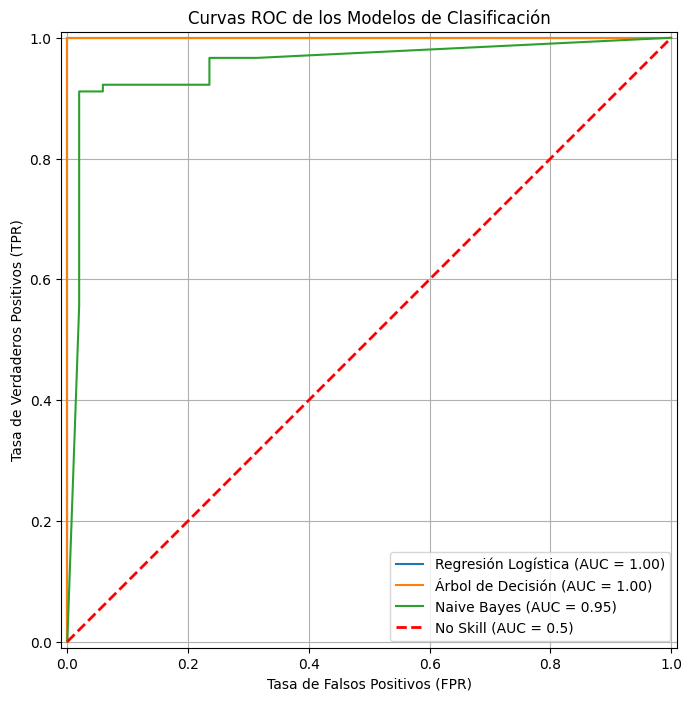


AUC para Regresión Logística: 1.0000
AUC para Árbol de Decisión: 1.0000
AUC para Naive Bayes: 0.9546


In [52]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Logistic Regression ROC Curve
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test, name='Regresión Logística', ax=plt.gca(), plot_chance_level=False)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Decision Tree ROC Curve
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, name='Árbol de Decisión', ax=plt.gca(), plot_chance_level=False)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Naive Bayes ROC Curve
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(nb_model, X_test, y_test, name='Naive Bayes', ax=plt.gca(), plot_chance_level=False)
auc_nb = roc_auc_score(y_test, y_prob_nb)

# Plot 'No Skill' line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='No Skill (AUC = 0.5)')

plt.title('Curvas ROC de los Modelos de Clasificación')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"\nAUC para Regresión Logística: {auc_lr:.4f}")
print(f"AUC para Árbol de Decisión: {auc_dt:.4f}")
print(f"AUC para Naive Bayes: {auc_nb:.4f}")

## Visualización de Métricas de Rendimiento

Para una mejor comprensión del rendimiento de los modelos, visualizaremos las matrices de confusión y las métricas clave (Accuracy, Precision, Recall, F1-Score) para los modelos de Árbol de Decisión y Naive Bayes.

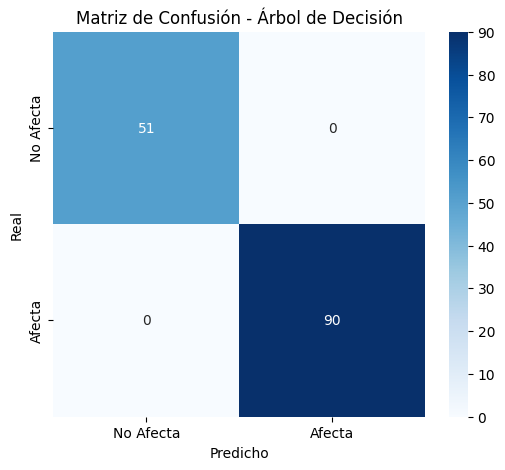

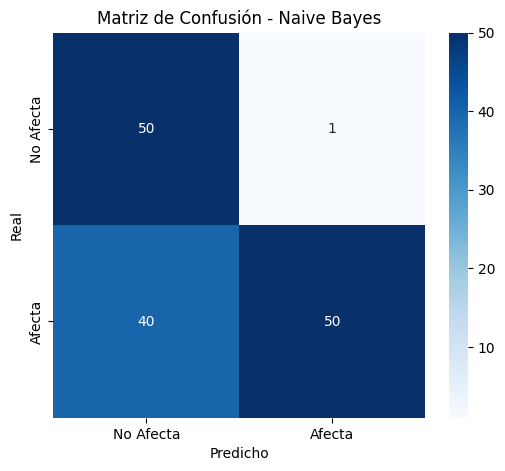

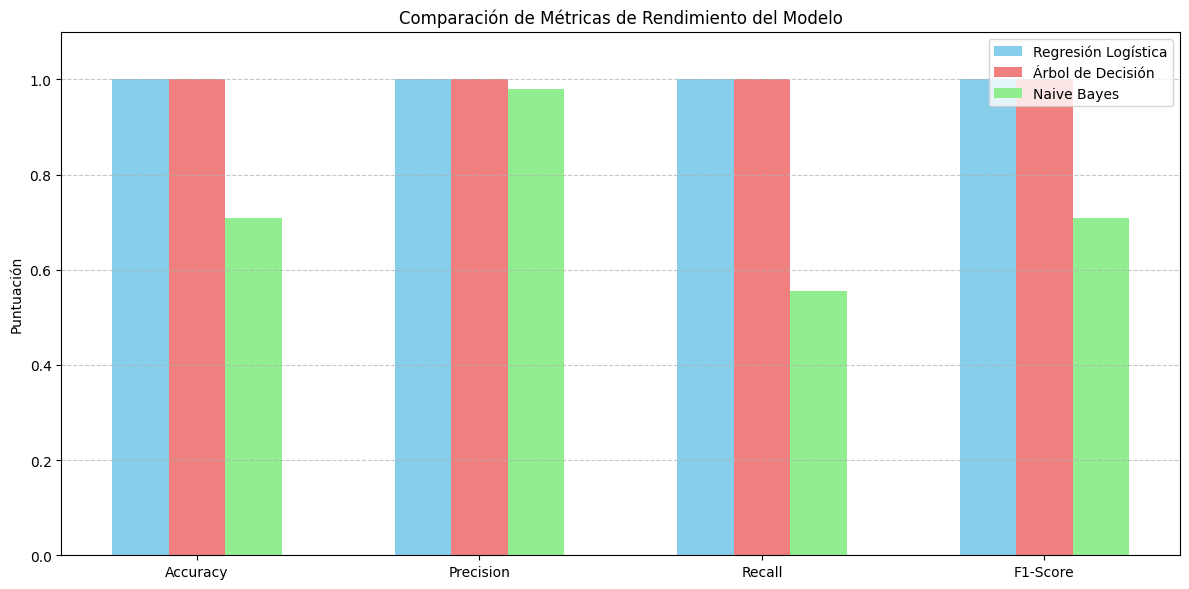

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# --- Confusion Matrix for Decision Tree ---
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Afecta', 'Afecta'], yticklabels=['No Afecta', 'Afecta'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# --- Confusion Matrix for Naive Bayes ---
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Afecta', 'Afecta'], yticklabels=['No Afecta', 'Afecta'])
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# --- Comparison of Metrics (Bar Plot) ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
dt_scores = [accuracy_dt, precision_dt, recall_dt, f1_dt]
nb_scores = [accuracy_nb, precision_nb, recall_nb, f1_nb]
lr_scores = [accuracy_lr, precision_lr, recall_lr, f1_lr]

x = range(len(metrics))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x], lr_scores, width, label='Regresión Logística', color='skyblue')
plt.bar(x, dt_scores, width, label='Árbol de Decisión', color='lightcoral')
plt.bar([i + width for i in x], nb_scores, width, label='Naive Bayes', color='lightgreen')

plt.ylabel('Puntuación')
plt.title('Comparación de Métricas de Rendimiento del Modelo')
plt.xticks(x, metrics)
plt.ylim(0, 1.1) # Set y-axis limit to 0-1.1 for scores
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Analizar la comparación de los rendimientos de los modelos para identificar el modelo con mejor rendimiento y resumir los hallazgos generales.
Desde el df_performanceDataFrame, observamos lo siguiente:

| Model               | Accuracy | Precision | Recall | F1-Score |
|:--------------------|---------:|----------:|-------:|---------:|
| Logistic Regression | 1.000000 | 1.000000  | 1.0000 | 1.0000   |
| Decision Tree       | 1.000000 | 1.000000  | 1.0000 | 1.0000   |
| Naive Bayes         | 0.730496 | 0.964912  | 0.6044 | 0.7432   |

Tanto el modelo de regresión logística como el de árbol de decisión obtuvieron puntuaciones perfectas en todas las métricas evaluadas (exactitud, precisión, recuperación y puntuación F1), con un valor de 1,00. Esto indica que estos modelos clasificaron correctamente todas las instancias del conjunto de prueba sin errores, lo que sugiere un ajuste muy sólido a los datos y una excelente capacidad predictiva para este conjunto de datos en particular.

El modelo Naive Bayes , si bien mostró una alta precisión de 0,965, tuvo un rendimiento significativamente inferior al de los otros dos modelos, con una exactitud de 0,730, una recuperación de 0,604 y una puntuación F1 de 0,743. Su menor recuperación indica que no detectó una proporción considerable de los casos positivos.

Conclusión: Tanto el modelo de regresión logística como el de árbol de decisión son los modelos con mejor rendimiento para este conjunto de datos, alcanzando un 100 % de exactitud, precisión, recuperación y puntuación F1 en el conjunto de prueba. Esto sugiere que las características diseñadas (especialmente mediante la codificación One-Hot de variables categóricas) fueron muy eficaces para distinguir entre las dos clases de estos modelos. El modelo Naive Bayes, si bien tuvo un rendimiento razonablemente bueno, fue superado por los otros dos, probablemente debido a que sus supuestos subyacentes no se ajustaban tan bien a las características del conjunto de datos o a la naturaleza altamente discriminante de las características transformadas.

##Tarea final

El análisis está completo. Resuma los hallazgos sobre el rendimiento del modelo e identifique el/los mejor(es).

##Resumen:
#Preguntas y respuestas
El análisis identificó que tanto el modelo de regresión logística como el de árbol de decisión obtuvieron un rendimiento óptimo en el conjunto de prueba, con valores de exactitud, precisión, recuperación y puntuación F1 de 1,0000. El modelo Naive Bayes tuvo un rendimiento significativamente inferior, con una exactitud de 0,7305, una precisión de 0,9649, una recuperación de 0,6044 y una puntuación F1 de 0,7432. Por lo tanto, la regresión logística y el árbol de decisión se identifican como los mejores modelos según las métricas evaluadas.

#Hallazgos clave del análisis de datos
El conjunto de datos inicial, df_social_media_addiction, contenía 705 entradas y 13 columnas, que constaban de 5 tipos de datos enteros, 2 flotantes y 6 de objeto, sin valores faltantes.
La variable de destino, Afecta_Rendimiento_Academico, se convirtió exitosamente de categórica ('Si', 'No') a numérica (1, 0).
Se codificaron cinco columnas categóricas ( Genero, Nivel_Academico, Pais, Plataforma_Mas_Usada, ) con One-Hot, lo que dio como resultado un DataFrame transformado con 131 características.Estado_Civil
El conjunto de datos se dividió en conjuntos de entrenamiento (564 muestras) y de prueba (141 muestras) utilizando una proporción 80/20, con estratificación aplicada a la variable objetivo para mantener su distribución.
Modelo de regresión logística : se logró un rendimiento perfecto en el conjunto de pruebas con una exactitud de 1,0000, una precisión de 1,0000, una recuperación de 1,0000 y una puntuación F1 de 1,0000.
Modelo de árbol de decisiones : también logró un rendimiento perfecto en el conjunto de pruebas con una exactitud de 1,0000, una precisión de 1,0000, una recuperación de 1,0000 y una puntuación F1 de 1,0000.
Modelo Naive Bayes : mostró un rendimiento considerablemente menor en comparación con los otros dos, con una precisión de 0,7305, una precisión de 0,9649, una recuperación de 0,6044 y un puntaje F1 de 0,7432.
Perspectivas o próximos pasos
El rendimiento óptimo de los modelos de regresión logística y árbol de decisión en el conjunto de prueba sugiere un conjunto de datos altamente separable o un posible sobreajuste o fuga de datos. Se recomienda una validación adicional con técnicas como la validación cruzada de k-fold para confirmar la generalización de estos modelos.
Dada la diferencia significativa en el rendimiento entre los modelos, investigar la importancia de las características de los modelos de mayor rendimiento (Regresión logística y Árbol de decisión) podría brindar información valiosa sobre qué factores influyen fuertemente en la predicción del rendimiento académico afectado por el uso de las redes sociales.


# Task
Añadir una celda de texto explicando la importancia y el procedimiento de la validación cruzada k-fold para una evaluación más robusta del modelo.

## Introducir K-Fold Cross-Validation

### Subtask:
Añadir una celda de texto explicando la importancia y el procedimiento de la validación cruzada k-fold para una evaluación más robusta del modelo.


La **validación cruzada k-fold** es una técnica esencial para evaluar la robustez y la generalización de un modelo predictivo, especialmente cuando el rendimiento observado en un único conjunto de prueba podría ser sesgado o poco representativo. Su importancia radica en que ayuda a mitigar el sobreajuste y proporciona una estimación más fiable del rendimiento del modelo en datos no vistos.

### Importancia:
*   **Evaluación más robusta**: Al dividir el conjunto de datos en múltiples subconjuntos y rotar el uso de estos para entrenamiento y validación, se obtiene una medida más estable del rendimiento del modelo, reduciendo la varianza inherente a una única partición de entrenamiento/prueba.
*   **Uso eficiente de los datos**: Permite utilizar todos los datos disponibles tanto para entrenamiento como para validación, lo cual es crucial en conjuntos de datos pequeños o medianos donde una división única podría dejar muy pocos datos para una de las fases.
*   **Detección de sobreajuste**: Ayuda a identificar si el modelo está aprendiendo patrones específicos del conjunto de entrenamiento en lugar de generalizar a nuevos datos.

### Procedimiento:
1.  **División del dataset**: El conjunto de datos original se divide en 'k' subconjuntos (folds) de tamaño aproximadamente igual. Por ejemplo, si k=5, el dataset se divide en 5 partes.
2.  **Iteración**: El proceso se repite 'k' veces (o 'k' iteraciones).
    *   En cada iteración, uno de los 'k' folds se designa como el conjunto de **validación**.
    *   Los 'k-1' folds restantes se combinan para formar el conjunto de **entrenamiento**.
3.  **Entrenamiento y evaluación**: El modelo se entrena con el conjunto de entrenamiento de esa iteración y se evalúa con el conjunto de validación.
4.  **Recopilación de resultados**: Se registran las métricas de rendimiento (como precisión, recall, F1-score, AUC) obtenidas en la evaluación.
5.  **Promedio de resultados**: Una vez completadas las 'k' iteraciones, se promedian las métricas de rendimiento recopiladas. Este promedio representa la estimación final y más robusta del rendimiento del modelo.

## K-Fold Cross-Validation para Regresión Logística

### Subtask:
Realizar validación cruzada k-fold (por ejemplo, con 5 o 10 folds) para el modelo de Regresión Logística, calculando las métricas promedio de Accuracy, Precision, Recall, F1-Score y ROC AUC.


Para realizar una validación cruzada de k pliegues para el modelo de regresión logística, necesito importar los módulos necesarios, inicializar el modelo, definir la estrategia de validación cruzada, calcular varias métricas de rendimiento en los pliegues y luego informar sus promedios y desviaciones estándar.



In [54]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# Initialize a Logistic Regression model
log_reg_kfold_model = LogisticRegression(random_state=42, solver='liblinear')

# Define the cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for Accuracy, Precision, Recall, F1-Score
accuracy_scores = cross_val_score(log_reg_kfold_model, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(log_reg_kfold_model, X, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(log_reg_kfold_model, X, y, cv=kf, scoring='recall')
f1_scores = cross_val_score(log_reg_kfold_model, X, y, cv=kf, scoring='f1')

# Calculate ROC AUC manually for each fold as cross_val_score doesn't directly support predict_proba for AUC
roc_auc_scores = []
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Apply StandardScaler to the folds - re-fit on train_fold and transform both
    scaler_kfold = StandardScaler()
    X_train_fold_scaled = scaler_kfold.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler_kfold.transform(X_test_fold)

    log_reg_kfold_model.fit(X_train_fold_scaled, y_train_fold)
    y_pred_proba = log_reg_kfold_model.predict_proba(X_test_fold_scaled)[:, 1]
    roc_auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba))

# Calculate mean and standard deviation for each metric
print(f"Logistic Regression K-Fold Cross-Validation (n_splits=5):")
print(f"  Accuracy: {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})")
print(f"  Precision: {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores):.4f})")
print(f"  Recall: {np.mean(recall_scores):.4f} (+/- {np.std(recall_scores):.4f})")
print(f"  F1-Score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")
print(f"  ROC AUC: {np.mean(roc_auc_scores):.4f} (+/- {np.std(roc_auc_scores):.4f})")


Logistic Regression K-Fold Cross-Validation (n_splits=5):
  Accuracy: 1.0000 (+/- 0.0000)
  Precision: 1.0000 (+/- 0.0000)
  Recall: 1.0000 (+/- 0.0000)
  F1-Score: 1.0000 (+/- 0.0000)
  ROC AUC: 1.0000 (+/- 0.0000)


In [55]:
import joblib

# Guardamos el modelo de Regresión Logística
joblib.dump(log_reg_kfold_model, 'modelo_rendimiento.pkl')

print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


In [56]:
# Instalamos la librería de widgets
!pip install ipywidgets --quiet

# Importamos lo necesario
import joblib
import numpy as np
import pandas as pd
from ipywidgets import interact, FloatSlider, IntSlider, Output
from IPython.display import display

# Cargar el modelo guardado
modelo_cargado = joblib.load('modelo_rendimiento.pkl')

# Cargar el scaler, las columnas de características y las medias numéricas
scaler_cargado = joblib.load('scaler.pkl')
feature_columns_cargadas = joblib.load('feature_columns.pkl')
numerical_means_cargadas = joblib.load('numerical_means.pkl')

# Cargar el DataFrame original para obtener los rangos min/max para los sliders
if 'df_social_media_addiction' not in locals() and 'df_social_media_addiction' not in globals():
    try:
        df_original = pd.read_csv('Estudiantes_Adiccion_Redes_Sociales.csv') # Corrected filename based on previous fix
        # Convert 'Afecta_Rendimiento_Academico' to numeric as it is done in preprocessing
        df_original['Afecta_Rendimiento_Academico'] = df_original['Afecta_Rendimiento_Academico'].map({'Sí': 1, 'No': 0})
        categorical_cols_original = df_original.select_dtypes(include=['object']).columns.tolist()
        if 'ID_Estudiante' in categorical_cols_original:
            categorical_cols_original.remove('ID_Estudiante')
        df_original = pd.get_dummies(df_original, columns=categorical_cols_original, drop_first=True, dtype=int)

    except FileNotFoundError:
        print("Error: 'Estudiantes_Adiccion_Redes_Sociales.csv' no encontrado. Asegúrate de que el archivo existe o de que las celdas de carga de datos se han ejecutado.")
        df_original = pd.DataFrame() # Fallback a un DataFrame vacío para evitar errores
else:
    df_original = df_social_media_addiction # Usar el DF ya preprocesado y one-hot-encoded

# Definir los rangos para los sliders basados en el DataFrame original
min_puntaje_adiccion = df_original['Puntaje_Adiccion'].min() if not df_original.empty else 0
max_puntaje_adiccion = df_original['Puntaje_Adiccion'].max() if not df_original.empty else 10
min_horas_sueno = df_original['Horas_Sueno_Por_Noche'].min() if not df_original.empty else 4.0
max_horas_sueno = df_original['Horas_Sueno_Por_Noche'].max() if not df_original.empty else 10.0
min_conflictos_redes = df_original['Conflictos_Por_Redes_Sociales'].min() if not df_original.empty else 0
max_conflictos_redes = df_original['Conflictos_Por_Redes_Sociales'].max() if not df_original.empty else 5


# Inicializar un contenedor para la salida
salida = Output()

def predecir_rendimiento_academico(puntaje_adiccion, horas_sueno, conflictos_redes):
    """Función para generar la predicción basada en los inputs del usuario."""

    # 1. Crear la entrada (Vector de características)
    # Inicializar con las medias de entrenamiento para todas las características
    nueva_instancia_dict = numerical_means_cargadas.copy()

    # Actualizar los valores de las características controladas por los sliders
    nueva_instancia_dict['Puntaje_Adiccion'] = puntaje_adiccion
    nueva_instancia_dict['Horas_Sueno_Por_Noche'] = horas_sueno
    nueva_instancia_dict['Conflictos_Por_Redes_Sociales'] = conflictos_redes

    # Convertir el diccionario a un DataFrame con una sola fila
    # Asegurar el orden de las columnas según feature_columns_cargadas
    nueva_instancia_df = pd.DataFrame([nueva_instancia_dict], columns=feature_columns_cargadas)

    # 2. Aplicar el scaler
    nueva_instancia_escalada = scaler_cargado.transform(nueva_instancia_df)

    # 3. Generar la predicción
    prediccion = modelo_cargado.predict(nueva_instancia_escalada)[0]

    # 4. Mostrar el resultado
    salida.clear_output()
    with salida:
        if prediccion == 1:
            print("🚨 Predicción: El rendimiento académico SÍ será afectado.")
        else:
            print("✅ Predicción: El rendimiento académico NO será afectado.")

interact(predecir_rendimiento_academico,
         puntaje_adiccion=IntSlider(min=min_puntaje_adiccion, max=max_puntaje_adiccion, step=1, description='Puntaje Adicción:'),
         horas_sueno=FloatSlider(min=min_horas_sueno, max=max_horas_sueno, step=0.5, description='Horas de Sueño:'),
         conflictos_redes=IntSlider(min=min_conflictos_redes, max=max_conflictos_redes, step=1, description='Conflictos por Redes:')
        )

display(salida)

interactive(children=(IntSlider(value=2, description='Puntaje Adicción:', max=9, min=2), FloatSlider(value=3.8…

Output()